# **COVID-19**



In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Carregando o CSV e imprimindo as 5 primeiras linhas para saber como ele é
url = 'https://raw.githubusercontent.com/Ramo-Estudantil-IEEE-UFBA/ArtIEEEficiais/main/M%C3%B3dulo%202%20-%20Data%20Science%20-%202021.1/5.%20Projeto%20Final/Covid-19-World-Dataset.csv'
df = pd.read_csv(url)
df.head()

In [ ]:
df.shape

## **Análise Exploratória**

In [ ]:
df.describe()

In [ ]:
#Vendo os tipos dos dados e colunas de maneira mais clara
df.info()

In [ ]:
df.iso_code.unique()

## Preprossing data

In [ ]:
#Verificando a quantidade de Missing values por coluna
df.isnull().sum()

In [ ]:
#Filtando o dataframe com os iso_coode correspondentes aos dados gerais
search = "OWID"
index = df["iso_code"].str.startswith(search, na = False)
world_data= df[index]
world_data

In [ ]:
world_data.columns

In [10]:
features=['iso_code','location','date','total_cases','new_cases','total_deaths', 'new_deaths','total_vaccinations','people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations']
world_data = world_data[features]


In [ ]:
world_data.isnull().sum()

In [ ]:
world_data.fillna("0",inplace=True)

In [ ]:
world_data.isnull().sum()


In [14]:
#Separando um dataframe para com os dados especificos de cada região
dfa = df[index == False]

In [ ]:
dfa.isnull().sum()

In [ ]:
dfa.fillna("0",inplace=True)


In [ ]:
dfa.isnull().sum()

Tratando os dados negativos da coluna New Deaths


In [18]:
x = pd.to_numeric(world_data['new_cases']) <0
world_data[x]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
42524,OWID_INT,International,6/28/2021,722,-5,15,0,0,0,0,0


In [19]:
world_data.shape

(5258, 11)

In [20]:

world_datat = world_data.loc[(pd.to_numeric(world_data.new_deaths) >= 0) & (pd.to_numeric(world_data.new_cases) >= 0)]
world_datat.shape

(5254, 11)

In [21]:
world_datat.reset_index(drop=True, inplace=True)
world_datat.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,OWID_AFR,Africa,2/13/2020,0,0,0,0,0,0,0,0
1,OWID_AFR,Africa,2/14/2020,1,1,0,0,0,0,0,0
2,OWID_AFR,Africa,2/15/2020,1,0,0,0,0,0,0,0
3,OWID_AFR,Africa,2/16/2020,1,0,0,0,0,0,0,0
4,OWID_AFR,Africa,2/17/2020,1,0,0,0,0,0,0,0


##Classificando os dados

In [ ]:
world_datat["date"] = pd.to_datetime(world_datat.date)
world_datat.head()


In [ ]:
world_datat[[ 'total_cases', 'new_cases','total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations']] = world_datat[[ 'total_cases', 'new_cases','total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations']].apply(pd.to_numeric)

# **Visualização dos Dados** 


In [25]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

##**World**

In [26]:
world_datat.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,OWID_AFR,Africa,2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OWID_AFR,Africa,2020-02-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,OWID_AFR,Africa,2020-02-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OWID_AFR,Africa,2020-02-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OWID_AFR,Africa,2020-02-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
fig = px.bar(world_datat, x='date', y=world_datat['new_cases'],title= 'Cases per day World ', 
             labels={ "date": "Days", "new_cases": "New Cases"})
fig.show()

In [28]:
fig = px.pie(dfa, values='total_cases', names='continent', color_discrete_sequence=px.colors.qualitative.Prism, title= "Total Cases per Continent")
fig.show()

In [29]:
fig = px.bar(world_datat, x="location", y="total_cases", color="location")
fig.show()

## Mortes


In [30]:
fig = px.bar(world_datat, x='date', y= world_datat.new_deaths,title= 'New Deaths per day World ', 
             labels={ "date": "Days", "new_deaths": "New Deaths"})
fig.show()

In [31]:
fig = px.bar(world_datat, x='date', y= world_datat.total_deaths,title= 'Total deaths per day World ', 
             labels={ "date": "Days", "total_deaths": "Total Deaths"},color= 'location')
fig.show()

## Progresso da Vacinação mundialmente


In [32]:
maior = world_datat.loc[(pd.to_numeric(world_datat.total_vaccinations) > 0)]
fig = px.bar(maior, x='date', y="total_vaccinations",color= 'location', title= "Vaccination Progress",labels={ "total_vaccinations": "Total Vaccinations", "date": "Day"})
fig.show()

In [33]:
maior = world_datat.loc[(pd.to_numeric(world_datat.new_vaccinations) > 0)]
fig = px.bar(maior, x='date', y= 'new_vaccinations',labels={ "new_vaccinations": " New Vaccinations", "date": "Day"},color= 'location', title= 'New Vaccinations per day')
fig.show()

In [34]:
maior = world_datat.loc[(pd.to_numeric(world_datat.people_fully_vaccinated) > 0)]
fig = px.bar(maior, x="date", y=maior.people_fully_vaccinated, color='location', 
              labels={ "people_fully_vaccinated": "People Fully Vaccinated", "date": "Day"}, title= 'People Fully Vaccinated per day')
fig.show()

#Relação do progresso da vacina com o total de casos e mortes


In [39]:
correlation = world_datat[['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations']].corr()

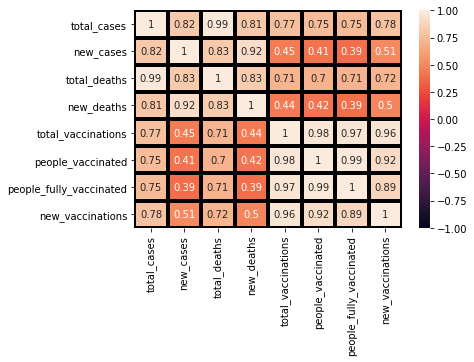

In [40]:

ax = sns.heatmap(correlation, annot= True, vmin=-1, vmax=1,linewidths=3, linecolor='black')

Percebe-se através da correlação entre as colunas uma relação entre o progresso da vacinas com os totais de mortes e casos. Demonstrando a eficácio com casos menos graves e no número de casos